In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow.keras.optimizers
import matplotlib.pyplot as plt

In [2]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

In [3]:
data=np.loadtxt("../../data/TR.csv",delimiter=",")
input_data=data[:,1:-2][0:1000]
labels=data[:,-2:][0:1000]
val_data=data[:,1:-2][1000:-1]
val_labels=data[:,-2:][1000:-1]

In [5]:
x=Input(shape=(10,))
hidden=Dense(10,activation="sigmoid")(x)
out=Dense(2,activation="linear")(hidden)

In [6]:
model=Model(inputs=x,outputs=out)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Trucco per fissare il learning rate costante
optimizer = tensorflow.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(5e-5)
model.compile(optimizer=optimizer,loss="mean_squared_error",metrics=["MeanSquaredError"])

In [8]:
history=model.fit(input_data,labels,epochs=3000)

Epoch 1/3000
32/32 [==============================] - 1s 3ms/step - loss: 209.7632 - mean_squared_error: 209.7632
Epoch 2/3000
32/32 [==============================] - 0s 3ms/step - loss: 209.4590 - mean_squared_error: 209.4590
Epoch 3/3000
32/32 [==============================] - 0s 3ms/step - loss: 209.1526 - mean_squared_error: 209.1526
Epoch 4/3000
32/32 [==============================] - 0s 3ms/step - loss: 208.8473 - mean_squared_error: 208.8473
Epoch 5/3000
32/32 [==============================] - 0s 3ms/step - loss: 208.5449 - mean_squared_error: 208.5449
Epoch 6/3000
32/32 [==============================] - 0s 3ms/step - loss: 208.2412 - mean_squared_error: 208.2412
Epoch 7/3000
32/32 [==============================] - 0s 3ms/step - loss: 207.9377 - mean_squared_error: 207.9377
Epoch 8/3000
32/32 [==============================] - 0s 3ms/step - loss: 207.6357 - mean_squared_error: 207.6357
Epoch 9/3000
32/32 [==============================] - 0s 3ms/step - loss: 207.3324 - mea

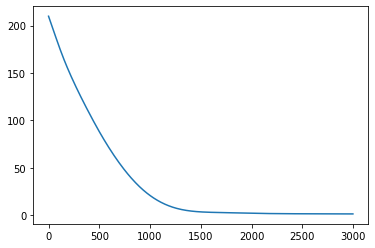

In [9]:
plt.plot(history.history["loss"])
#Viene molto più smooth di come fatta da noi, dov'è magagna?